# 4. What Is The Status of Progress?
#### Methodology
1. Clean and simplify the status field into 5 categories.
2. Analyze status distribution over time and service request types.
3. Display the results using stacked bar charts.

#### Import Libraries and Data

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

from matplotlib.ticker import PercentFormatter, FuncFormatter

df_original = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\8_Service_request\Customer_Service_Requests.csv', dtype={12 : object})

sns.set_style('ticks')

# Remove unnecessary columns
df = df_original[['Service Request Number', 'Service Request Type', 'City Department',
       'Created Date', 'Method Received', 'Status',  'ZIP Code']].copy()
df.loc[:,'date'] =pd.to_datetime(df['Created Date'])

In [11]:
df['year']=df['date'].dt.to_period('M')
df['Y']=df['date'].dt.year

#### Simplify Status Categories
Assign cleaned status using dictionary and create new column 'simple_stat' 

In [12]:
status_dict={
'open': 'In Progress',
'closed' :'Closed',
'Reported|New':'New',
'Canceled' :'Canceled',
'Transferred':'Transferred'
}

In [13]:
# create simplified column 'simple_stat'
for key, value in status_dict.items():
    df.loc[df['Status'].str.contains(key, case=False, na=False), 'simple_stat'] = value

Create a pivot table to plot with percentage. Visualize cleaned 5 status categories as stacked bar chart by year.

In [ ]:
df_status_year = df.pivot_table(index='simple_stat',values='date',aggfunc='count',columns='Y').T
df_status_year['sum']=df_status_year.sum(axis=1)

# Convert to percentage
for col in df_status_year.columns :
    df_status_year[col]=df_status_year[col].div(df_status_year['sum']/100)

df_status_year.drop(labels='sum',axis=1,inplace=True)

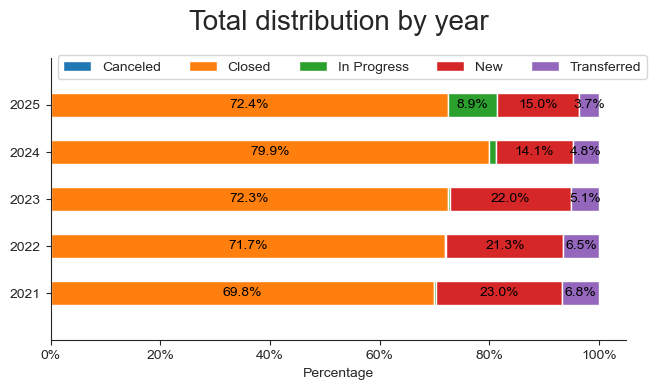

In [70]:
ax = df_status_year.plot(kind='barh', stacked=True,figsize=(7,4))

plt.legend(ncol=5, bbox_to_anchor=(0, 0.9),loc='lower left')
plt.title('Total distribution by year',fontsize=20,pad=20)

for container in ax.containers:
     labels = [f'{v.get_width():.1f}%' if v.get_width() > 3 else '' for v in container]
     ax.bar_label(container, labels=labels,label_type='center', fontsize=10, color='black')
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.ylabel('')
sns.despine() 
plt.ylim(-1,5)
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()

Considering that 2025 is still in progress, it appears that service requests have been handled well over time.

Visualize cleaned 5 status categories as stacked bar chart by top 5 requested service types.

In [38]:
# From 0_Intro.ipynb
df_type = df.groupby('Service Request Type')['Service Request Number'].count().reset_index().sort_values(by='Service Request Number',ascending=False)
# Make list of top 5 service request type
top5 = df_type['Service Request Type'].head().tolist() 

In [ ]:
df_status_type = df.pivot_table(index='simple_stat',values='date',aggfunc='count',columns='Service Request Type').T
df_status_type['sum']=df_status_type.sum(axis=1)

# Convert to percentage
for col in df_status_type.columns :
    df_status_type[col]=df_status_type[col].div(df_status_type['sum']/100)

df_status_type.drop(labels='sum',axis=1,inplace=True)

In [36]:
# Edit legend labels for visibility 
legend_labels = ['Abandoned Vehicle/ \n72hr Parking Ordinance', 
 'Parking Enforcement',
 'Unauthorized Encampment',
 'Illegal Dumping/ \nNeedles',
   'Graffiti']

In [41]:
df_status_type=df_status_type[df_status_type.index.isin(top5)].fillna(0)

In [ ]:
df_status_type = df_status_type.reindex(top5)
df_status_type.index=legend_labels

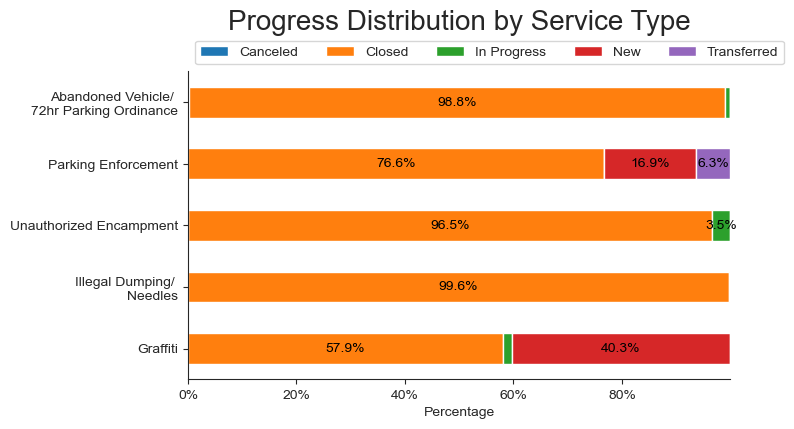

In [ ]:
ax = df_status_type.plot(kind='barh', stacked=True,figsize=(7,4))

plt.legend(ncol=5, bbox_to_anchor=(0, 1),loc='lower left')
plt.title('Progress Distribution by Service Type',fontsize=20,pad=30)

for container in ax.containers:
     labels = [f'{v.get_width():.1f}%' if v.get_width() > 3 else '' for v in container]
     ax.bar_label(container, labels=labels,label_type='center', fontsize=10, color='black')

plt.ylabel('')
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
sns.despine() 
ax.invert_yaxis()
plt.xlim(0,100)
plt.xlabel('Percentage')
plt.show()

#### Insight
- Graffiti reports has most proportion of 'New', possibility to consider there are delays in processing.
- Illegal Dumping/ Needles and long-term parking issues are more likely 'Closed', implying well managed.